# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
%matplotlib inline

import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### 1. Is the distribution of body temperatures normal? 

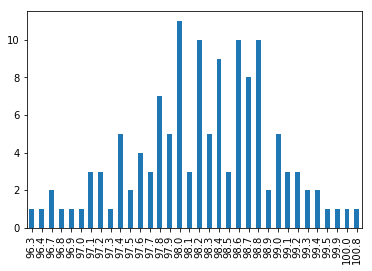

In [3]:
df.temperature.value_counts().sort_index().plot(kind = 'bar')

##### The data does appear to be a roughly normal distribution, though a little spikey.

# <font color='red'>FEEDBACK</font>
The above plot is good, though you can also do a histogram with `df.temperature.hist()` like so

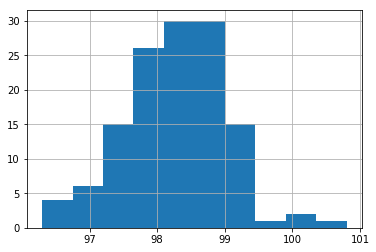

In [4]:
df.temperature.hist()

# <font color='red'>FEEDBACK</font>
Or, even better, seaborn's `distplot`

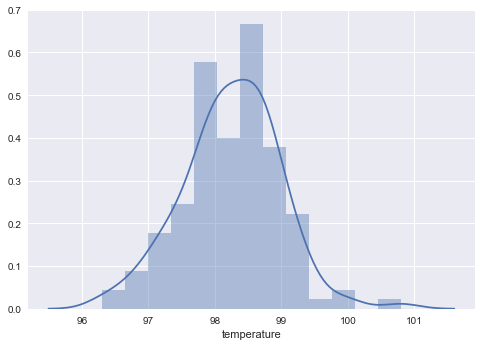

In [5]:
import seaborn as sns
sns.distplot(df.temperature)

#### 2. Is the sample size large? Are the observations independent?

In [6]:
len(df)

130

##### Yes, the sample size is large with 130 independent observations.

#### 3. Is the true population mean really 98.6 degrees F?

##### I will use a one-sample test, since we want to compare the population mean to the overall sample mean (vs separating out men & women or some other breakout of the sample population). A Z-test is appropriate for this sample, because while the sample size is > 30, and we can estimate the population standard deviation.

Using Z-Test:
Our Null Hypothesis is that the population mean is 98.6 degrees.

# <font color='red'>FEEDBACK</font>
This is correct. However, as discussed on the call, don't hard-code values like `11.40175`. Compute them directly, ideally inline, e.g. `std = df.temperature.std() / (len(df) ** 0.5)`

Also, a bit of terminology that will help with naming your variables:

* `s = df.temperature.std()` is the sample standard deviation, and approximately the population standard deviation (since N > 30). Seems like you already understand this.
* `std = df.temperature.std()/11.40175` is the "standard deviation of the sampling mean." That is, if you were to take repeated samples of 130 people and compute the means for each sample, these means would be distributed with mean x and standard deviation `std`.
* So maybe call the variables `sample_std` and `sampling_mean_std` respectively, or something similar in the future to avoid confusion.

Your confidence interval shows that you'd expect such sample means to fall within the (98.12, 98.37) range, so 98.6 can be safely rejected as you say.

In [7]:
# Sample Mean
x = df.temperature.mean()

# Sample Standard Deviation
s = df.temperature.std()

# Estimated Population Standard Deviation
std = df.temperature.std()/11.40175

# 95% confidence interval (z score of 1.96)
x-(1.96*std), x+(1.96*std)


(98.12319406523741, 98.37526747322414)

##### Based on the Z-Test, we are 95% confident that the population mean will fall between 98.123 degrees and 98.375 degrees.  Because 98.6 degrees falls outside of the confidence interval, we would REJECT the null hypothesis that the population mean is 98.6 degrees.

###### Using T-Test: 

# <font color='red'>FEEDBACK</font>
This also looks right for N = 130.

In [8]:
# Sample Mean
x = df.temperature.mean()

# Sample Standard Deviation
s = df.temperature.std()

# Estimated Population Standard Deviation
std = df.temperature.std()/11.40175

# 95% confidence interval (t score of 1.984)
x-(1.984*std), x+(1.984*std)

(98.1216507586579, 98.37681077980365)

##### Based on the T-Test, we are 95% confident that the population mean will fall between 98.121 degrees and 98.377 degrees.  Because 98.6 degrees falls outside of the confidence interval, we would still REJECT the null hypothesis.

#### 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [9]:
# 95% confidence interval (z score of 1.96)
x-(1.96*s), x+(1.96*s)

(96.81219177947445, 99.68626975898711)

##### If someone's temperature falls below 96.81 degrees or above 99.68 degrees, they will be outside of the 95% confidence interval for this sample and thus could be considered "abnormal

#### 5. Is there a significant difference between males and females in normal temperature?

##### Null Hypothesis: there is no difference between the body temperatures of males and females

# <font color='red'>FEEDBACK</font>
Again avoid magic numbers like `65` (use `len(f)` and `len(m)`) but otherwise this is correct


In [10]:
# Female mean temperature & standard deviation
f = df[df.gender == 'F']
f.temperature.mean()
f.temperature.std()

# Male mean temperature & standard deviation
m = df[df.gender == 'M']
m.temperature.mean()
m.temperature.std()

# Differences in the means
x2 = f.temperature.mean()-m.temperature.mean()

# Standard Deviation of the differences in the means
std2 = (((f.temperature.std())**2 + (m.temperature.std())**2)/65)**(1/2.0)

# 95% confidence interval of the difference in means (z score of 1.96)
x2 - 1.96*std2, x2 + 1.96*std2

(0.0411850264078672, 0.5372765120535867)

##### A 95% confidence interval shows the difference between female temperature and male temperature ranging from .04 degrees to .53 degrees.  Since that is a positive range, we can REJECT the null hypothesis that there is no difference between female and male body temperatures.

To get to this conclusion I used a two sample test, and applied a Z-test.

##### Conclusions: Based on the analysis above, I reject the hypothesis that the true population mean body temperature is 98.6 degrees.  There also seems to be a significant difference between male and female body temperatures.